# Tales Simões Mattos - BI Mastar - Turma 2019-2

## Análise e Previsão de Geração de Energia Eólica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

Lendo o dataset

In [2]:
data = pd.read_csv("Turbine.csv")

Explorando os dados

In [3]:
data.tail()


,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,1029.870744,59.060367,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,1030.160478,58.452003,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,1030.137822,58.034071,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,1030.178178,57.795387,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468
118223,2020-03-30 23:50:00+00:00,68.664425,27.915828,45.231610,1.499323,1.933124,1.933124,0.0,58.581716,54.080505,1029.834789,57.694813,56.741040,39.003815,35.914062,203.0,14.439669,9.235532,2.0,G01,203.0,3.475205


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    118224 non-null  object 
 1   ActivePower                   94750 non-null   float64
 2   AmbientTemperatue             93817 non-null   float64
 3   BearingShaftTemperature       62518 non-null   float64
 4   Blade1PitchAngle              41996 non-null   float64
 5   Blade2PitchAngle              41891 non-null   float64
 6   Blade3PitchAngle              41891 non-null   float64
 7   ControlBoxTemperature         62160 non-null   float64
 8   GearboxBearingTemperature     62540 non-null   float64
 9   GearboxOilTemperature         62438 non-null   float64
 10  GeneratorRPM                  62295 non-null   float64
 11  GeneratorWinding1Temperature  62427 non-null   float64
 12  GeneratorWinding2Temperature  62449 non-null

In [5]:
data.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [6]:
data.isnull().sum()

Unnamed: 0                          0
ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WTG                                 0
WindDirection                   45946
WindSpeed                       23629
dtype: int64

In [7]:
data.shape

(118224, 22)

In [8]:
# alterando a coluna Unnamed: 0 para datetype
turbina = data.copy()
turbina['Unnamed: 0'] = pd.to_datetime(turbina['Unnamed: 0'])
turbina.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

In [9]:
turbina.head()

,date,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [10]:
turbina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   date                          118224 non-null  datetime64[ns, UTC]
 1   ActivePower                   94750 non-null   float64            
 2   AmbientTemperatue             93817 non-null   float64            
 3   BearingShaftTemperature       62518 non-null   float64            
 4   Blade1PitchAngle              41996 non-null   float64            
 5   Blade2PitchAngle              41891 non-null   float64            
 6   Blade3PitchAngle              41891 non-null   float64            
 7   ControlBoxTemperature         62160 non-null   float64            
 8   GearboxBearingTemperature     62540 non-null   float64            
 9   GearboxOilTemperature         62438 non-null   float64            
 10  GeneratorRPM        

# Visualizando os dados

Geração de Energia ao longo do tempo

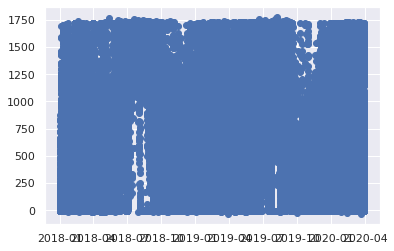

In [11]:
ig, ax = plt.subplots()
ax.scatter(turbina['date'], turbina["ActivePower"])

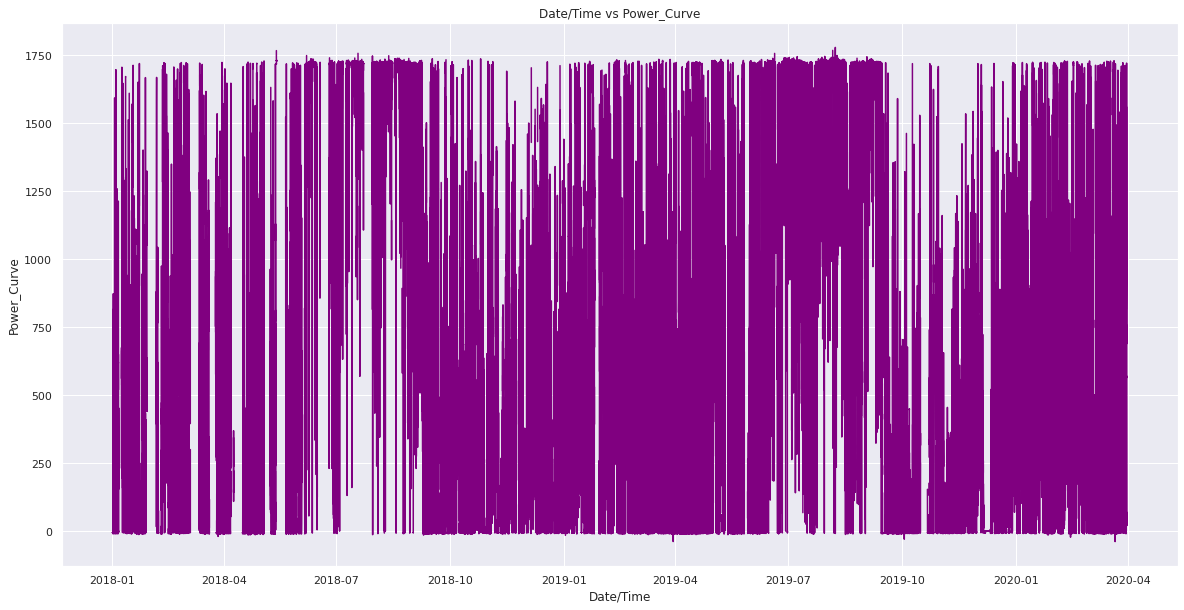

In [12]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(turbina['date'],
        turbina['ActivePower'],
        color='purple')

# Set title and labels for axes
ax.set(ylabel="Power_Curve",
       xlabel="Date/Time",
       title="Date/Time vs Power_Curve")

plt.show()

Curva de Potencia x Velocidade do Vento

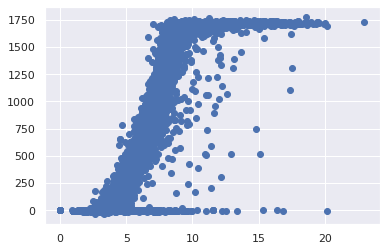

In [13]:
ig, ax = plt.subplots()
ax.scatter(turbina['WindSpeed'], turbina["ActivePower"])

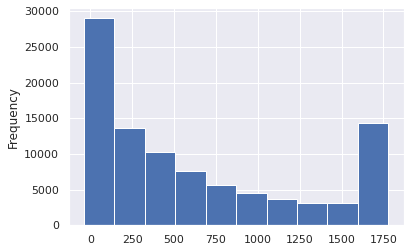

In [14]:
turbina.ActivePower.plot.hist()   #histograma da geração de energia

Correlação entre os dados

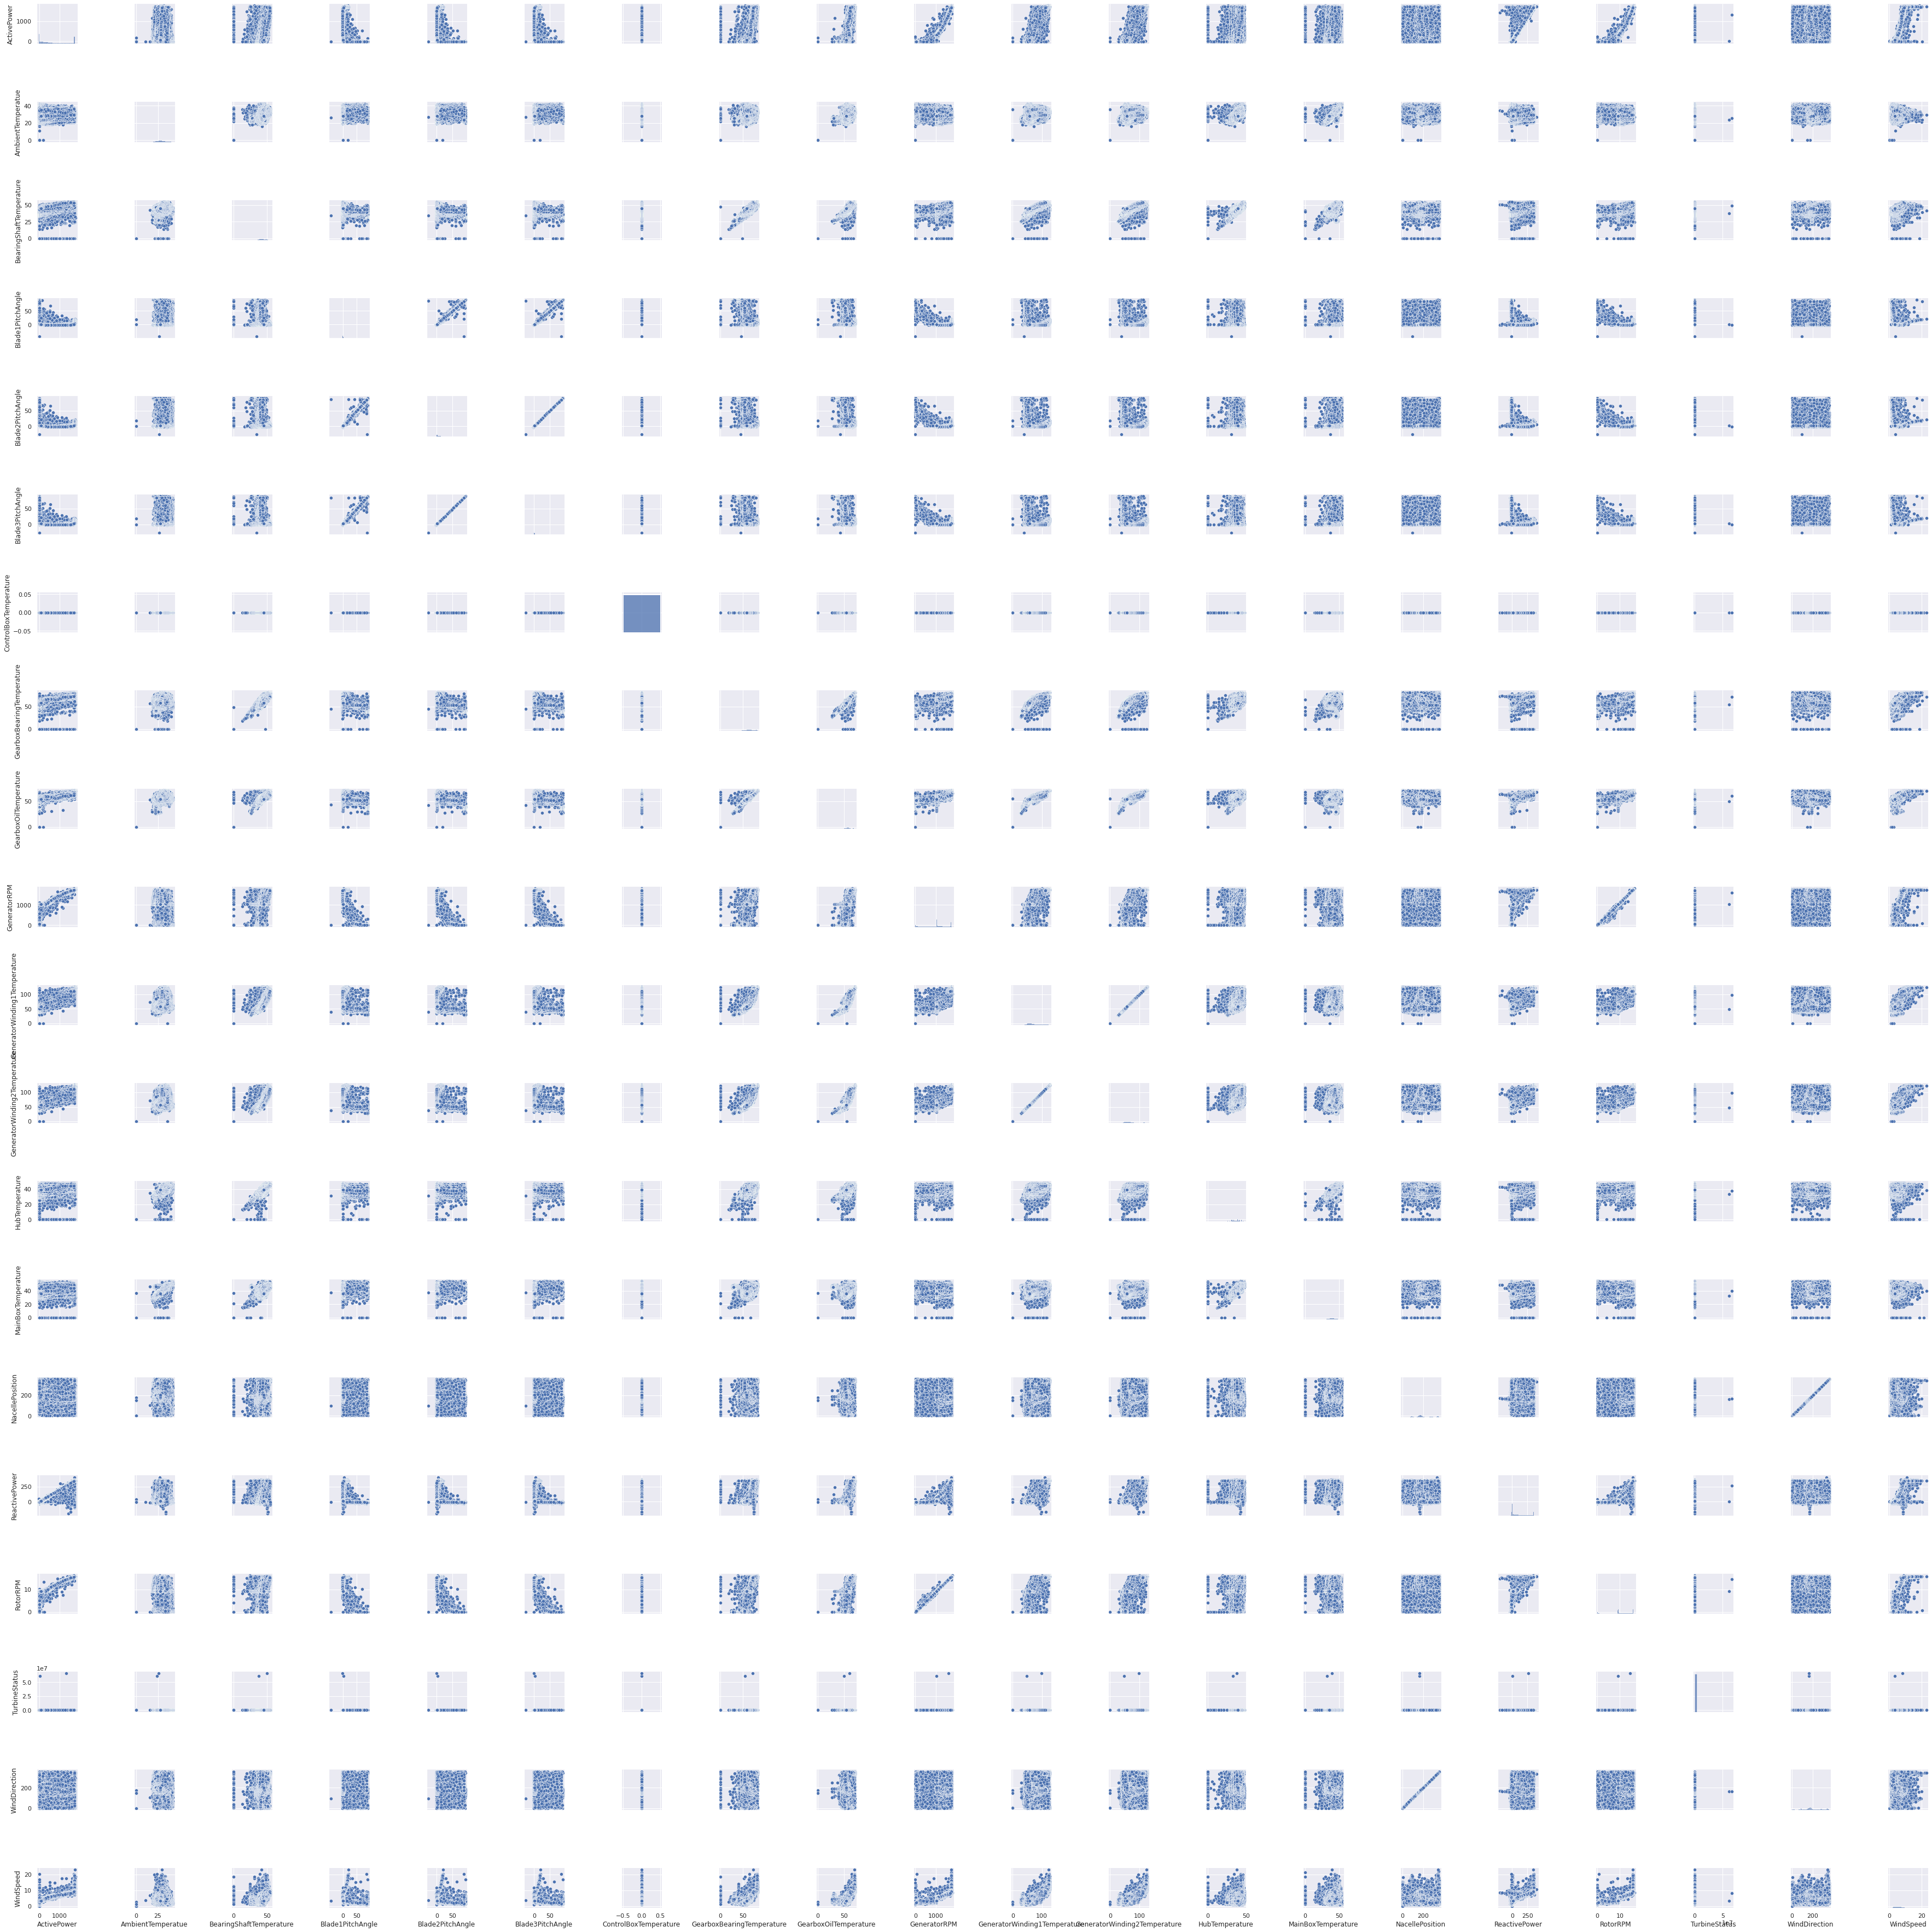

In [18]:
# Plotando as correlações entre todos os atributos
sns.pairplot(turbina)

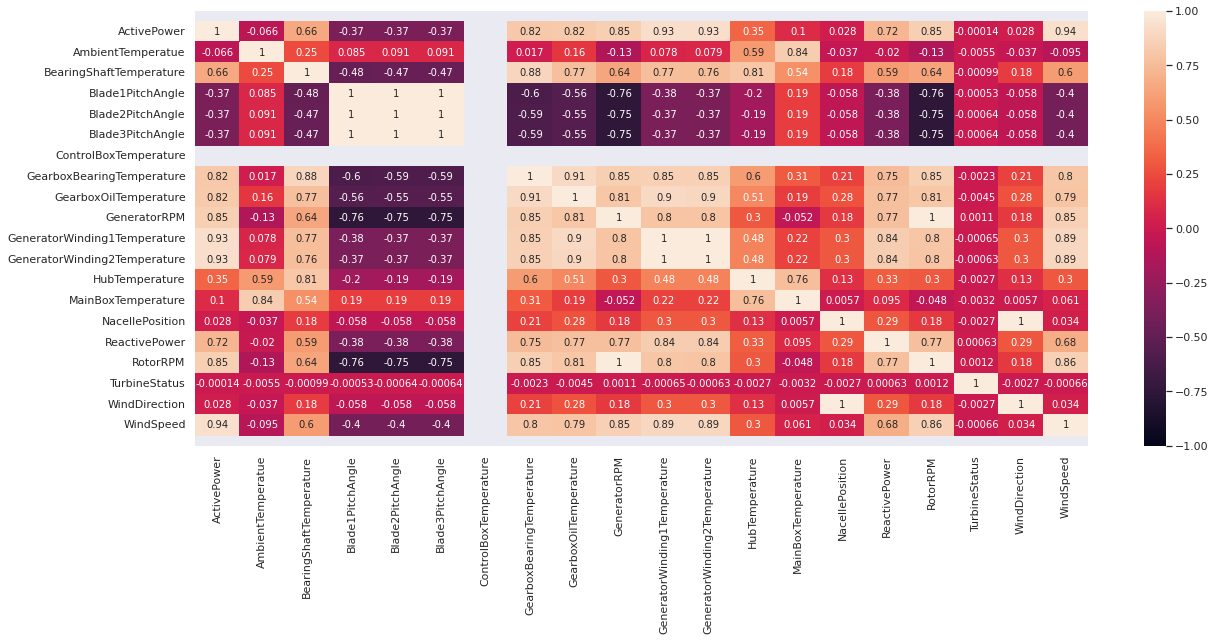

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
ActivePower,1.000000,-0.065637,0.655400,-0.368997,-0.367978,-0.367978,NaN,0.818850,0.821921,0.849604,0.931390,0.932521,0.347363,0.101627,0.028108,0.719092,0.849069,-0.000135,0.028108,0.940390
AmbientTemperatue,-0.065637,1.000000,0.246505,0.085461,0.090904,0.090904,NaN,0.017216,0.162511,-0.130123,0.077859,0.078736,0.589729,0.836539,-0.037498,-0.020313,-0.129290,-0.005511,-0.037498,-0.095308
BearingShaftTemperature,0.655400,0.246505,1.000000,-0.475557,-0.466856,-0.466856,NaN,0.883344,0.772887,0.640947,0.765115,0.763926,0.809116,0.542104,0.183929,0.594546,0.640584,-0.000990,0.183929,0.596201
Blade1PitchAngle,-0.368997,0.085461,-0.475557,1.000000,0.997774,0.997774,NaN,-0.599178,-0.557949,-0.757056,-0.376102,-0.372369,-0.198583,0.194911,-0.058300,-0.381478,-0.757147,-0.000534,-0.058300,-0.403092
Blade2PitchAngle,-0.367978,0.090904,-0.466856,0.997774,1.000000,1.000000,NaN,-0.592103,-0.549792,-0.754325,-0.371057,-0.367451,-0.190296,0.190562,-0.057624,-0.379541,-0.754539,-0.000636,-0.057624,-0.402786
Blade3PitchAngle,-0.367978,0.090904,-0.466856,0.997774,1.000000,1.000000,NaN,-0.592103,-0.549792,-0.754325,-0.371057,-0.367451,-0.190296,0.190562,-0.057624,-0.379541,-0.754539,-0.000636,-0.057624,-0.402786
ControlBoxTemperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GearboxBearingTemperature,0.818850,0.017216,0.883344,-0.599178,-0.592103,-0.592103,NaN,1.000000,0.906020,0.850209,0.853024,0.851923,0.596065,0.307694,0.214486,0.751875,0.850795,-0.002314,0.214486,0.800433
GearboxOilTemperature,0.821921,0.162511,0.772887,-0.557949,-0.549792,-0.549792,NaN,0.906020,1.000000,0.806972,0.899693,0.898335,0.506648,0.190350,0.277619,0.770088,0.807776,-0.004536,0.277619,0.793140
GeneratorRPM,0.849604,-0.130123,0.640947,-0.757056,-0.754325,-0.754325,NaN,0.850209,0.806972,1.000000,0.796434,0.795223,0.303804,-0.052185,0.176964,0.768065,0.999723,0.001133,0.176964,0.854787


In [19]:
#Correlação entre os valores
corr = turbina.corr()
plt.figure(figsize=(20, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

# Eliminando os dados com baixa correlação

In [15]:
turb = turbina.drop(columns=['AmbientTemperatue','BearingShaftTemperature','Blade1PitchAngle','Blade2PitchAngle','Blade3PitchAngle','ControlBoxTemperature','HubTemperature','MainBoxTemperature','NacellePosition','ReactivePower','TurbineStatus','WindDirection','WTG','GearboxBearingTemperature','GearboxOilTemperature','GeneratorRPM','RotorRPM'], axis=1)

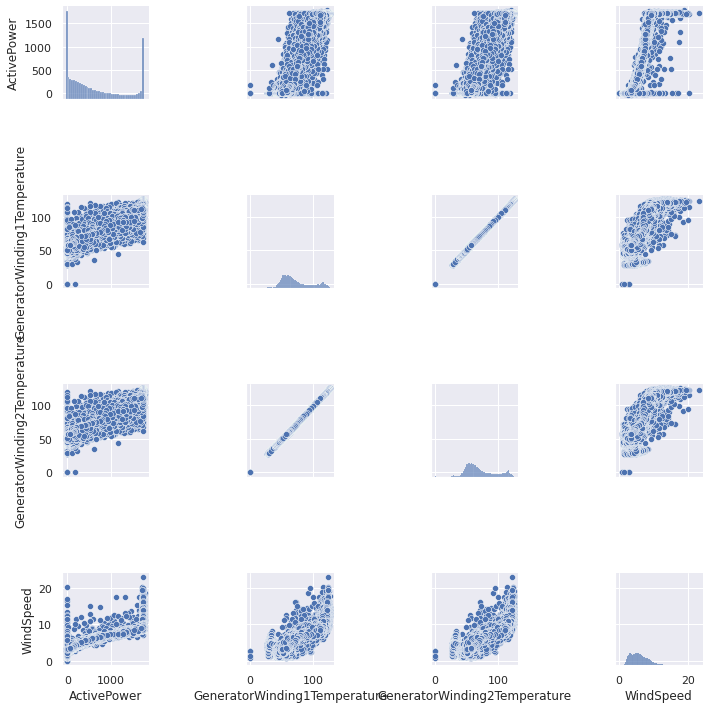

In [16]:
# Pair Plot correlation between all attributes
sns.pairplot(turb)

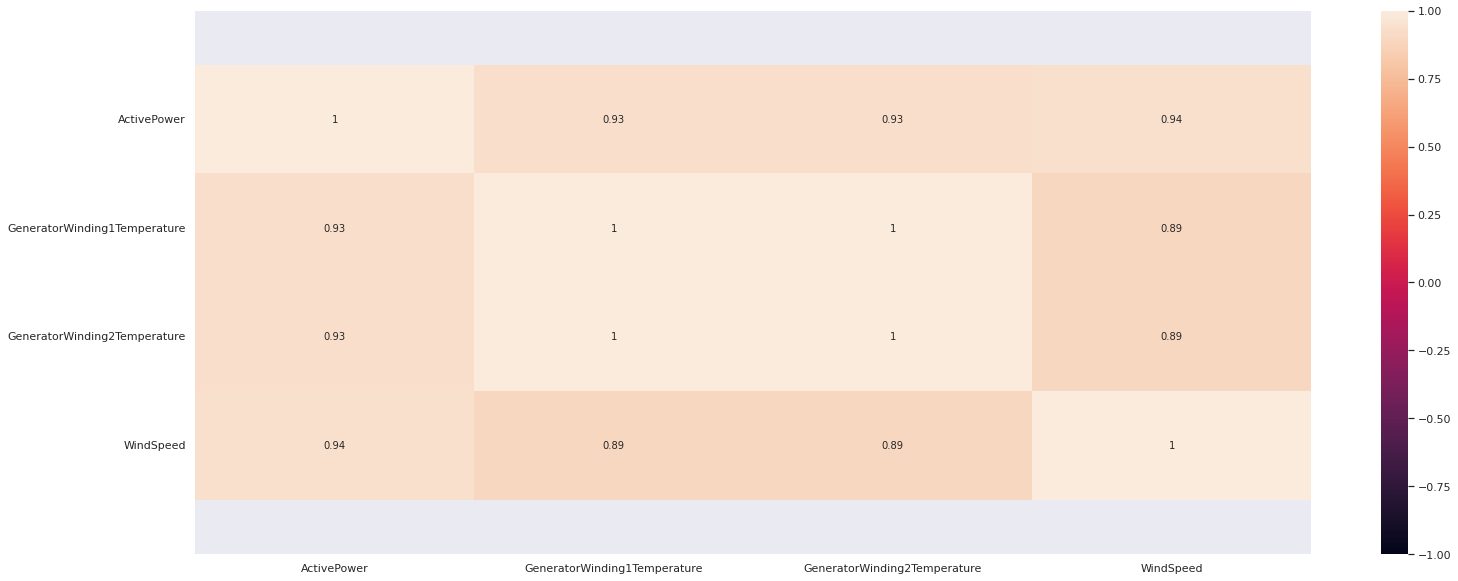

,ActivePower,GeneratorWinding1Temperature,GeneratorWinding2Temperature,WindSpeed
ActivePower,1.000000,0.931390,0.932521,0.940390
GeneratorWinding1Temperature,0.931390,1.000000,0.999959,0.894777
GeneratorWinding2Temperature,0.932521,0.999959,1.000000,0.894834
WindSpeed,0.940390,0.894777,0.894834,1.000000


In [17]:
#correlation between the values
corr = turb.corr()
plt.figure(figsize=(25, 10))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

Eliminando valores nulos

In [18]:
import missingno as msno

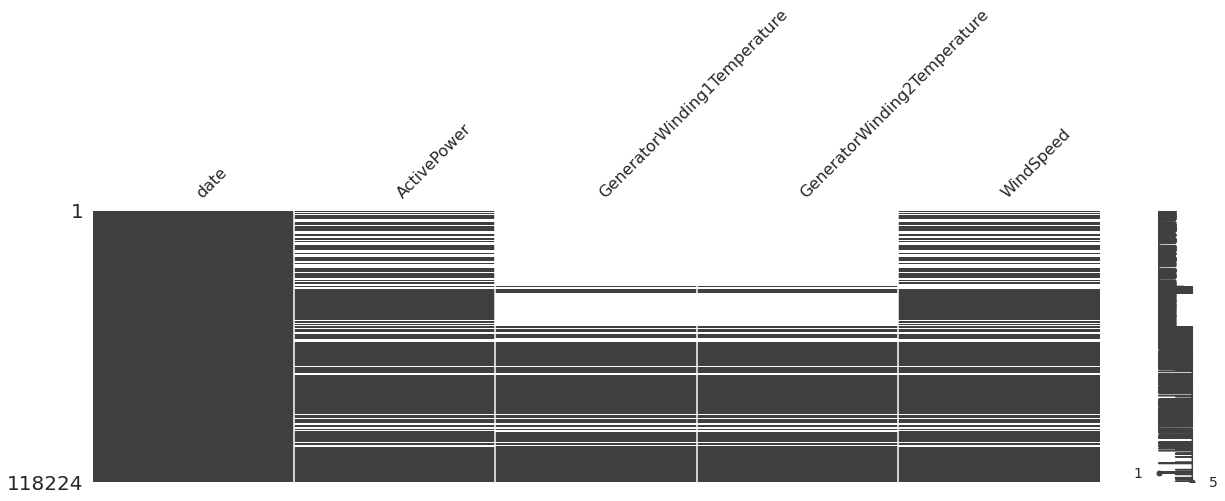

In [19]:
msno.matrix(turb, figsize=(20,5));

In [20]:
qq=turb.iloc[144:52704,:] # ano 2018

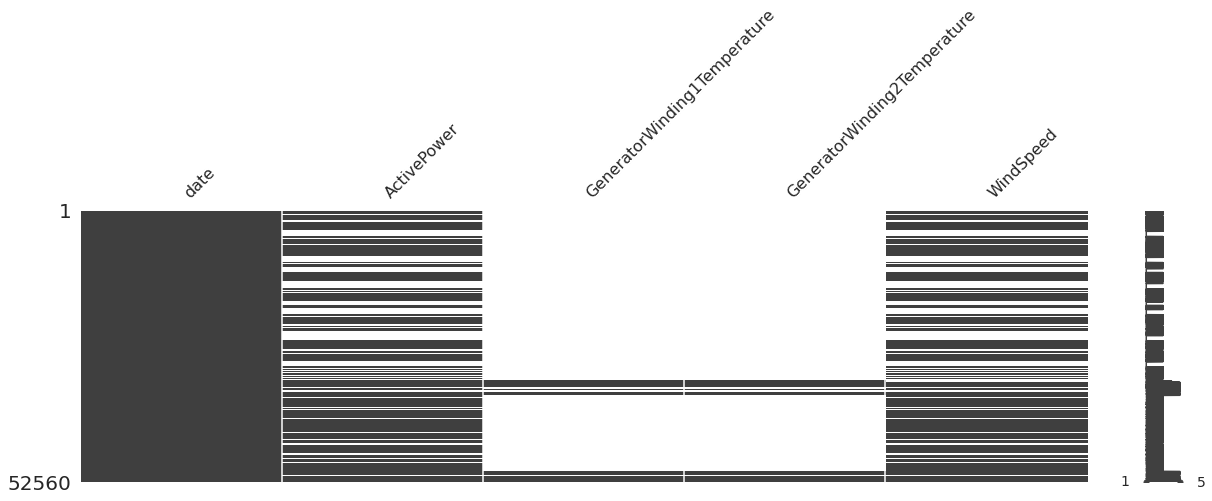

In [21]:
msno.matrix(qq, figsize=(20,5));

In [22]:
qq1=turb.iloc[52704:105264,:] # ano 2019
#qq.tail()

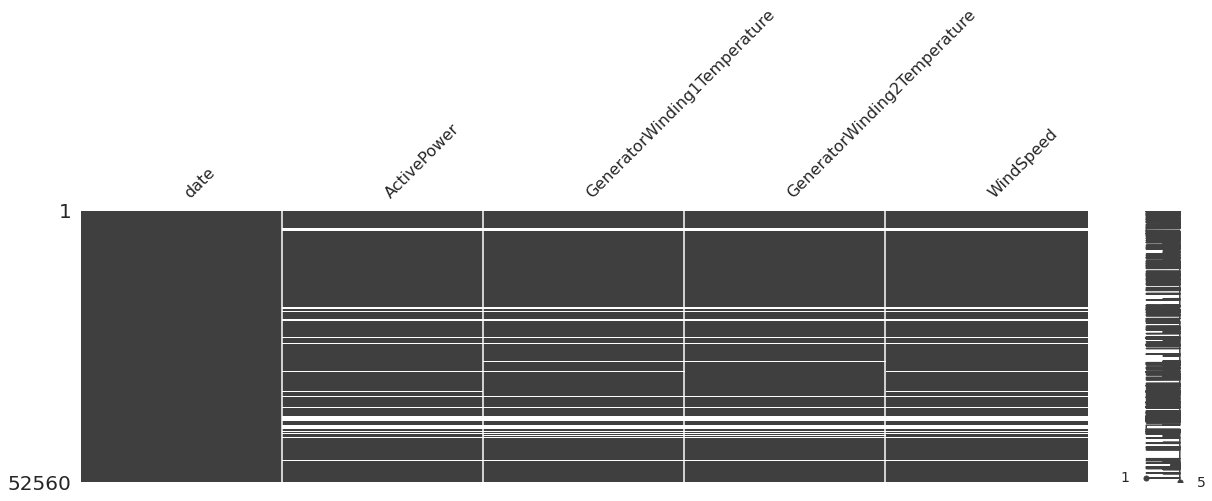

In [23]:
msno.matrix(qq1, figsize=(20,5));

In [24]:
qq2=turb.iloc[105264:118224,:] # ano 2020

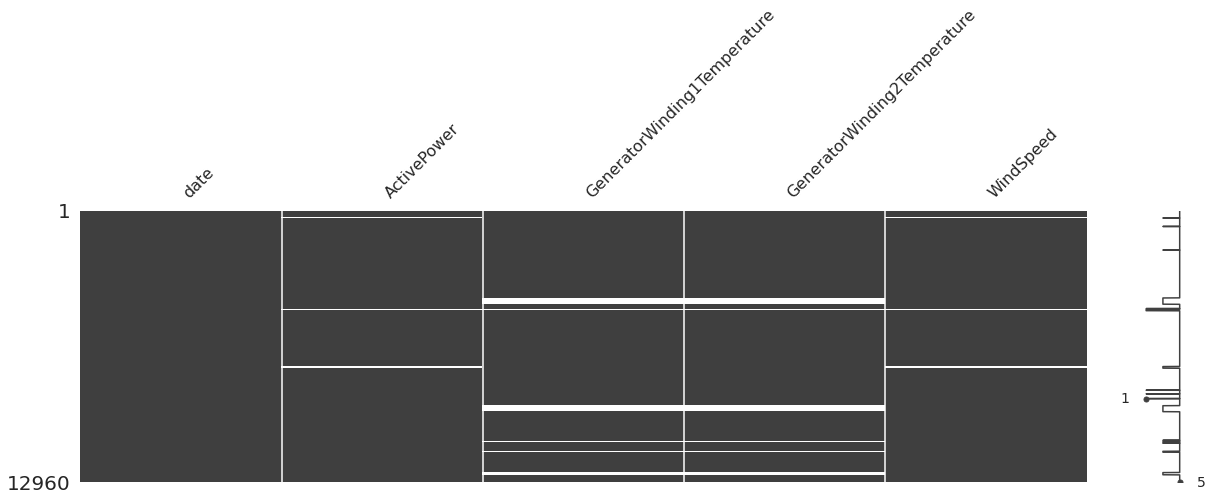

In [25]:
msno.matrix(qq2, figsize=(20,5));

In [26]:
# pela análise dos dados de 2018 verifica-se que possuem muitos vazios, onde se optou por utiliziar os dados de 2019 e 2020
turb = turb.iloc[52700:110000,:] # pegar os dados de 2019 e 2020

In [27]:
turb.shape

(57300, 5)

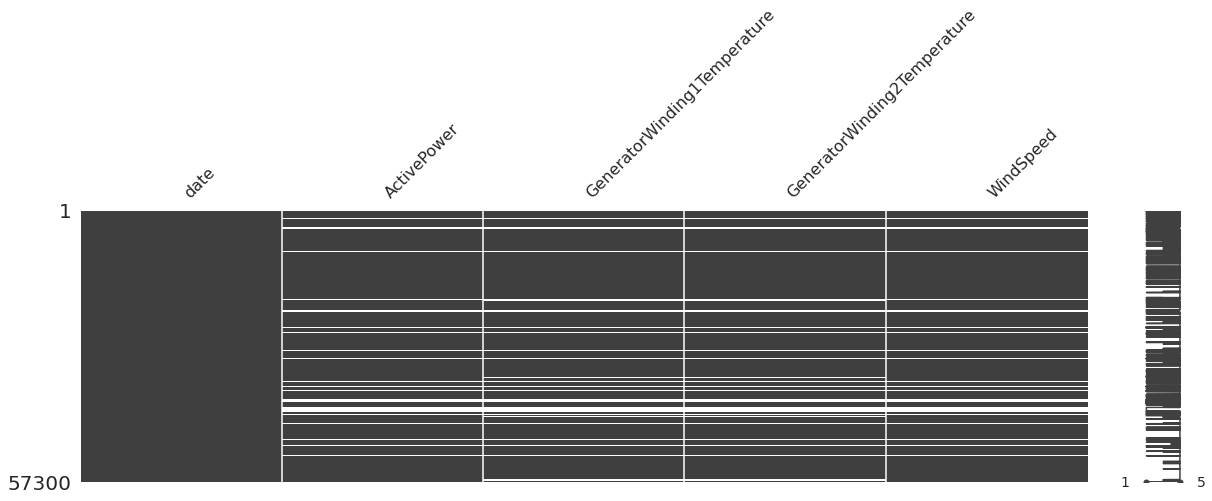

In [28]:
msno.matrix(turb, figsize=(20,5));

In [ ]:
# interpolar para nan
turb['ActivePower'].interpolate(method='linear', inplace=True)

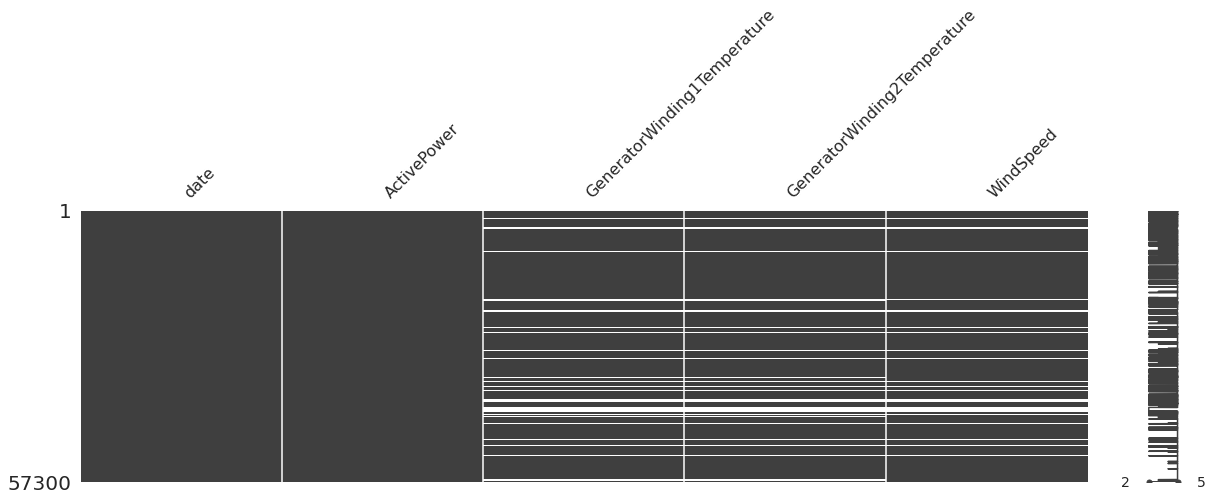

In [30]:
msno.matrix(turb, figsize=(20,5));

In [31]:
turb.isnull().sum()

date                               0
ActivePower                        0
GeneratorWinding1Temperature    6610
GeneratorWinding2Temperature    6588
WindSpeed                       5918
dtype: int64

In [32]:
turb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57300 entries, 52700 to 109999
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   date                          57300 non-null  datetime64[ns, UTC]
 1   ActivePower                   57300 non-null  float64            
 2   GeneratorWinding1Temperature  50690 non-null  float64            
 3   GeneratorWinding2Temperature  50712 non-null  float64            
 4   WindSpeed                     51382 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(4)
memory usage: 2.2 MB


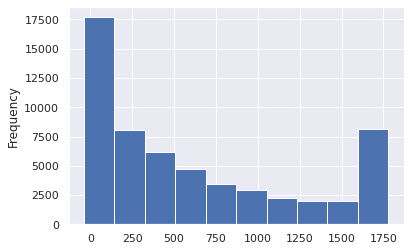

In [33]:
turb.ActivePower.plot.hist()

In [ ]:
#substituindo os valores negativos e iguais a zero da geração de energia por um valor próximo de zero,
#pois os valores negativos não fazem sentido e como existem muitos valores zero, podendo trazer problemas a rede.  
for index, row in turb.iterrows():
   if row['ActivePower'] < 0.001:
         turb.loc[index,'ActivePower'] = 0.001

In [35]:
turb.describe()

,ActivePower,GeneratorWinding1Temperature,GeneratorWinding2Temperature,WindSpeed
count,57300.000000,50690.000000,50712.000000,51382.000000
mean,614.963837,72.569128,71.939676,5.931706
std,603.647066,23.106962,23.128557,2.636723
min,0.001000,0.000000,0.000000,0.900000
25%,77.475773,55.558282,54.825451,3.866811
50%,404.965874,65.676214,64.897021,5.643730
75%,1054.834039,85.467918,84.936823,7.593284
max,1779.032433,126.773031,126.043018,22.970893


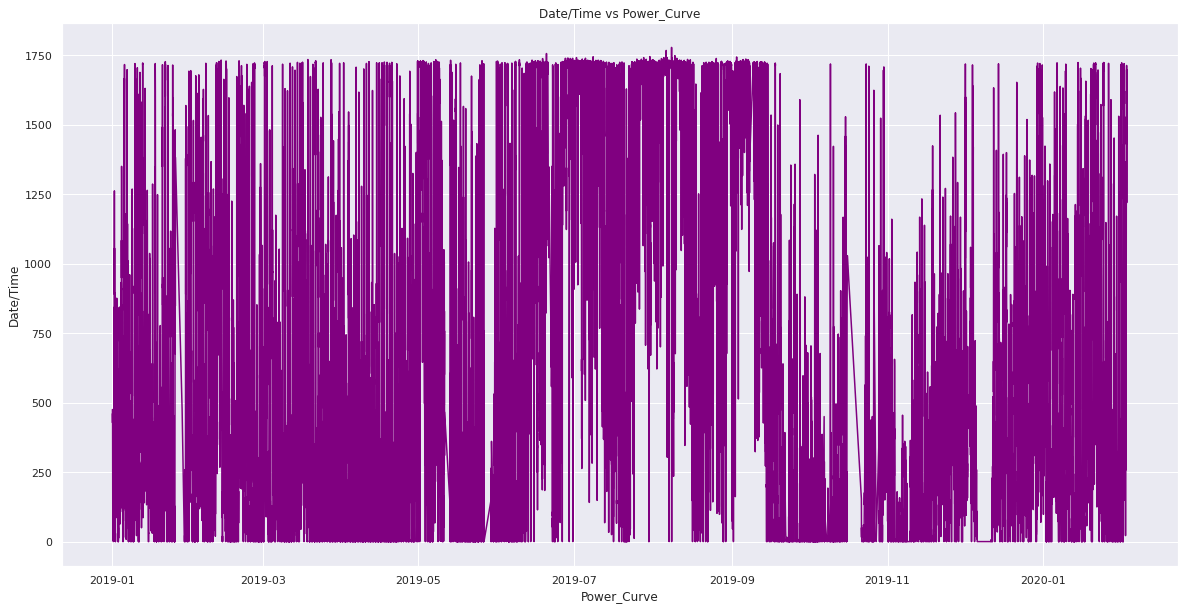

In [36]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(turb['date'],
        turb['ActivePower'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Power_Curve",
       ylabel="Date/Time",
       title="Date/Time vs Power_Curve")

plt.show()

## Separar os dados de Treino e Teste

In [37]:
train_turb = turb.iloc[0:52600,:]   #ano 2019
test_turb = turb.iloc[52600:57300,:]  #ano 2020

### Utilizando uma Rede Neural Recorrente para analisar a série e buscar fazer previsões

# Recurrent Neural Network - LSTM


## Parte 1 - Preprocessamento de Dados

In [38]:
dataset_train = train_turb
training_set = dataset_train.iloc[:, 1:2].values #só coluna da série em si

### Normalização

In [39]:
from sklearn.preprocessing import MinMaxScaler   #normalizando os dados
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Criar a estrutura de dados com janela 400 e output 1

In [40]:
#preparando os dados de entrada para a rede
window = 400    
trainSize = len(training_set_scaled)
X_train = []
y_train = []
for i in range(window, trainSize):
    X_train.append(training_set_scaled[i-window:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [41]:
X_train.shape   

(52200, 400)

In [42]:
X_train = np.reshape(X_train, (X_train.shape[0], 20, 20))

In [43]:
X_train.shape

(52200, 20, 20)

## Parte 2 - Construção da RNN

### Bibliotecas necessárias

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Construção da Rede completa

In [45]:
# Inicializar a RNN
regressor = Sequential()

# Adicionar a primeira camada LSTM e Dropout 
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (20, 20))) # quantidade de neuronios igual a 100
regressor.add(Dropout(0.2))   #adicionada camada de dropout, onde 20% das conexoes serão ignoradas dando mais robustez
 
# Adicionar a segunda camada LSTM e Dropout
regressor.add(LSTM(units = 80, return_sequences = True))# nessa camada não precisa do input_shape, porque ele pega da camada anterior 
regressor.add(Dropout(0.2))
 
# Adicionar a terceira camada LSTM e Dropout
regressor.add(LSTM(units = 50))# não tem return sequences porque é a ultima camada
regressor.add(Dropout(0.2))
 
# camada de saída
regressor.add(Dense(units = 1))    # camada de saida com 1 saida, um neuronio, que e o dado previsto
 
# Compilar a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Visualizar a rede
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 100)           48400     
                                                                 
 dropout (Dropout)           (None, 20, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 80)            57920     
                                                                 
 dropout_1 (Dropout)         (None, 20, 80)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                26200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [46]:
from tensorflow.keras.utils import plot_model

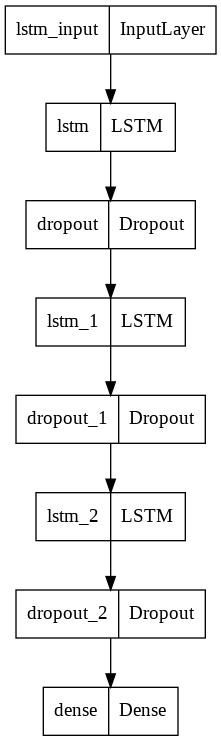

In [47]:
plot_model(regressor)   # apresenta todas as camadas

### Treinamento

In [48]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best.h5', save_best_only=True)
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split=0.2, callbacks = [mc]) 

Epoch 1/100
1305/1305 [==============================] - 69s 49ms/step - loss: 0.0260 - val_loss: 0.0039
Epoch 2/100
1305/1305 [==============================] - 63s 48ms/step - loss: 0.0107 - val_loss: 0.0033
Epoch 3/100
1305/1305 [==============================] - 63s 48ms/step - loss: 0.0097 - val_loss: 0.0049
Epoch 4/100
1305/1305 [==============================] - 64s 49ms/step - loss: 0.0091 - val_loss: 0.0031
Epoch 5/100
1305/1305 [==============================] - 63s 48ms/step - loss: 0.0089 - val_loss: 0.0032
Epoch 6/100
1305/1305 [==============================] - 63s 49ms/step - loss: 0.0087 - val_loss: 0.0032
Epoch 7/100
1305/1305 [==============================] - 64s 49ms/step - loss: 0.0086 - val_loss: 0.0031
Epoch 8/100
1305/1305 [==============================] - 65s 50ms/step - loss: 0.0085 - val_loss: 0.0030
Epoch 9/100
1305/1305 [==============================] - 64s 49ms/step - loss: 0.0085 - val_loss: 0.0032
Epoch 10/100
1305/1305 [==============================]

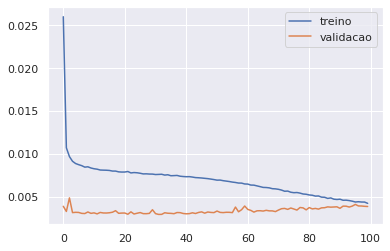

In [49]:
plt.plot(history.history['loss'], label = 'treino')
plt.plot(history.history['val_loss'], label = 'validacao')
plt.legend()

## Parte 3 - Fazer as previsões e analisar os resultados

### Base de teste

In [50]:
dataset_test = test_turb
test_turbine = dataset_test.iloc[:, 1:2].values

### Construir a estrutura para teste

In [51]:
dataset_total = pd.concat((dataset_train.iloc[:,1], dataset_test.iloc[:,1]), axis = 0)
testLength = len(dataset_test)
inputs = dataset_total[len(dataset_total) - testLength - window:].values
inputs = inputs.reshape(inputs.shape[0],1)
inputs = sc.transform(inputs)   #normalizando o treino
# Preparando X_test 
X_test = []
for i in range(window, inputs.shape[0]): 
    X_test.append(inputs[i-window:i, 0])
X_test = np.array(X_test)  # gera 
X_test = np.reshape(X_test, (X_test.shape[0], 20, 20))

preparada a base de test pode fazer as previsoes

### Fazer as previsões

In [52]:
regressor.load_weights('best.h5')
predicted_power = regressor.predict(X_test)
predicted_power = sc.inverse_transform(predicted_power)   #desnormalizar as previsoes

### Visualizar os resultados de treino e teste

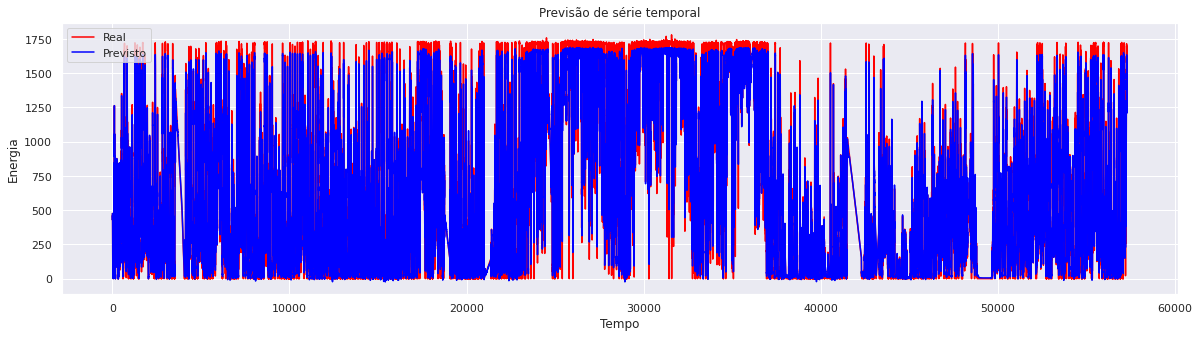

In [53]:
plt.figure(figsize=(20,5))
allTargetData = np.vstack((training_set, test_turbine)) # todos os valores reais
training_predicted_power = regressor.predict(X_train)
training_predicted_power = sc.inverse_transform(training_predicted_power) #normalizando a previsao para comparar
allForecastedData = np.vstack((training_set[0:window], training_predicted_power, predicted_power)) #todos os valores previstos
plt.Figure(figsize=(20,10))
plt.plot(allTargetData, color = 'red', label = 'Real')
plt.plot(allForecastedData, color = 'blue', label = 'Previsto')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Energia')
plt.legend()
plt.savefig('predictions_training_test.svg')
plt.show()

## Parte 4 - Métricas de avaliação

In [57]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_turbine, predicted_power))
print('RMSE: ', rmse)

RMSE:  114.37199563462437


In [58]:
mse = mean_squared_error(test_turbine, predicted_power)
print('MSE: ',mse)

MSE:  13080.953385446535


In [59]:
from sklearn.metrics import r2_score
r2_score(test_turbine, predicted_power)

0.9440809426376859